In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./202004-divvy-tripdata.csv', sep=',', header=0)
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [7]:
rides_per_day = df.groupby(df['started_at'].dt.date)['ride_id'].count()
rides_per_day.head()

started_at
2020-04-01    2294
2020-04-02    2608
2020-04-03    3532
2020-04-04    2288
2020-04-05    2887
Name: ride_id, dtype: int64

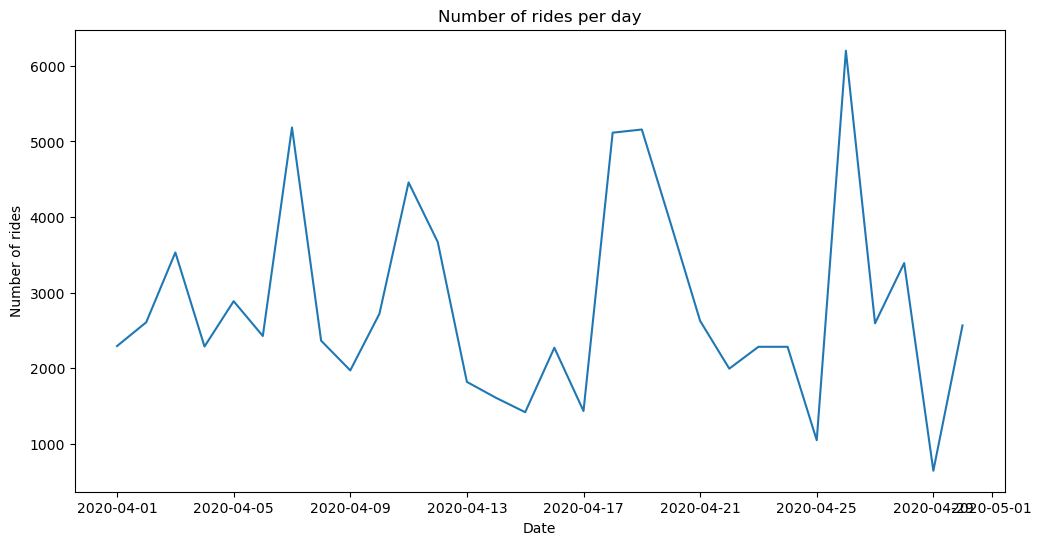

In [8]:
# Plot the number of rides per day

plt.figure(figsize=(12, 6))
plt.plot(rides_per_day)
plt.xlabel('Date')
plt.ylabel('Number of rides')
plt.title('Number of rides per day')
plt.show()

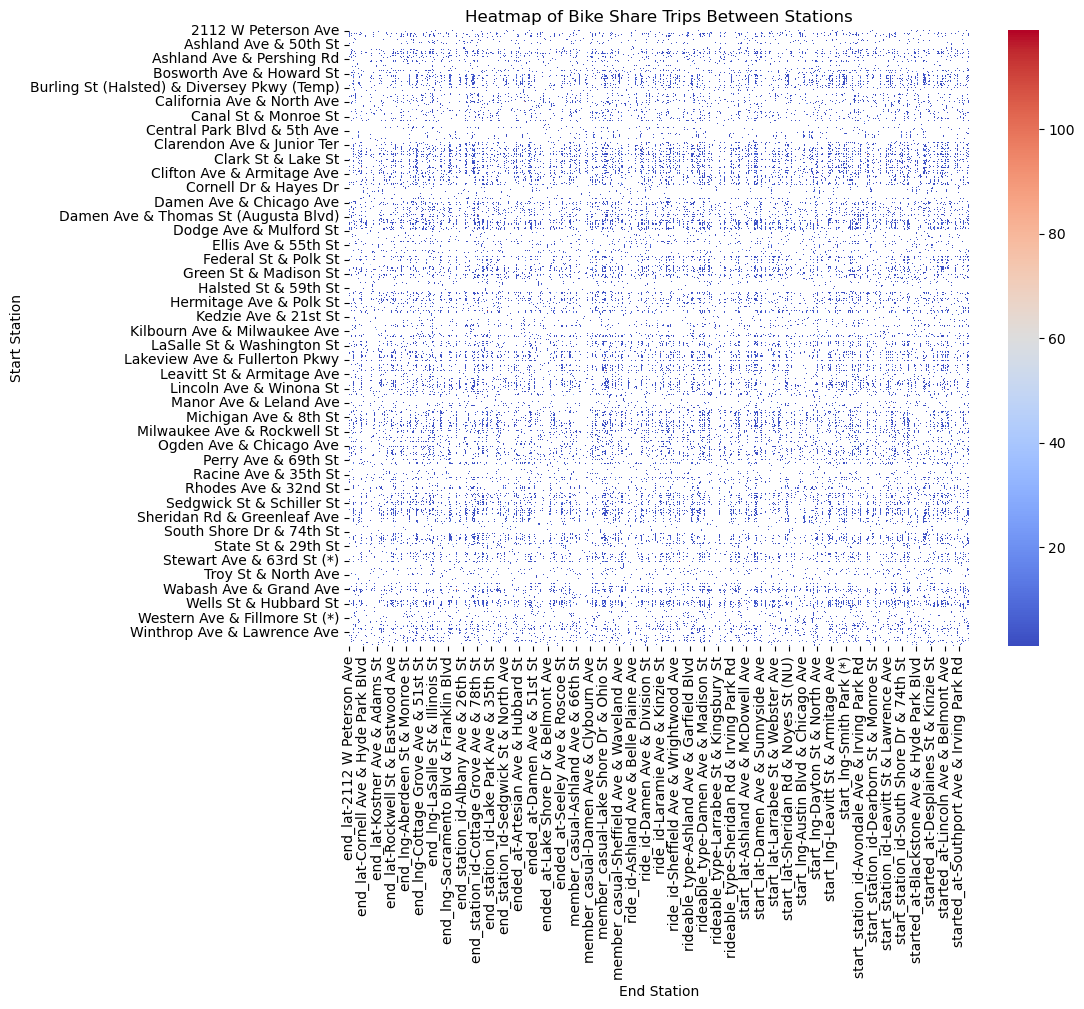

In [9]:
station_counts = pd.pivot_table(data=df, index='start_station_name', columns='end_station_name', aggfunc='count')

plt.figure(figsize=(10, 8))
sns.heatmap(station_counts, cmap='coolwarm')
plt.xlabel("End Station")
plt.ylabel("Start Station")
plt.title("Heatmap of Bike Share Trips Between Stations")
plt.show()

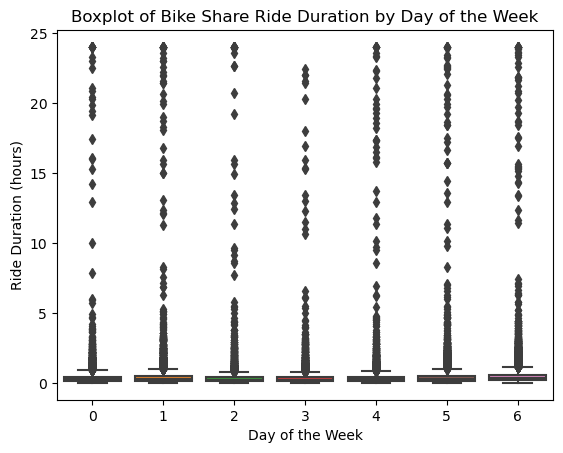

In [14]:
# Extract the day of the week from 'started_at'
df['weekday'] = df['started_at'].dt.dayofweek
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.seconds / 3600

# Create the boxplot
sns.boxplot(x="weekday", y="ride_duration", data=df)
plt.xlabel("Day of the Week")
plt.ylabel("Ride Duration (hours)")
plt.title("Boxplot of Bike Share Ride Duration by Day of the Week")
plt.show()